In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import datasets


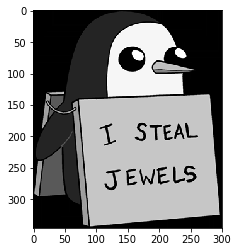

In [20]:
img_path = 'data/Gunter_in_Sign.png'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = gray.astype('float32')/255
plt.imshow(gray, cmap='gray')
plt.show()

In [21]:
#filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
filter_vals = np.array([[-2, -2, 2, 2], [-2, -2, 2, 2], [-2, -2, 2, 2], [-2, -2, 2, 2]])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [22]:
# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

In [23]:
# Network
class Net(nn.Module):
    def __init__(self, weight):
        super(Net, self).__init__()
        k_height, k_width = weight.shape[2:]
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        self.pool = nn.MaxPool2d(2,2)
    def forward(self, x):
        conv_x = self.conv(x)
        act_x = torch.relu(conv_x)
        pooled_x = self.pool(act_x)
        return conv_x, act_x, pooled_x

In [24]:
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [25]:

# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1)
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

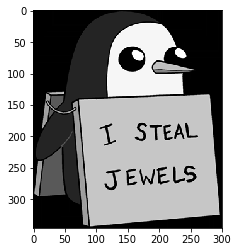

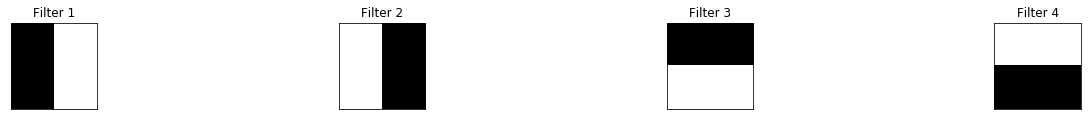

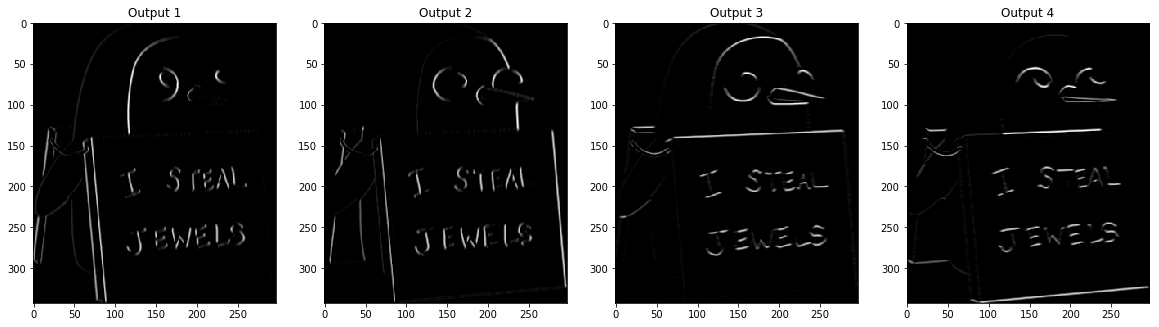

In [26]:

# plot original image
plt.imshow(gray, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray).unsqueeze(0).unsqueeze(1)

# get all the layers 
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

# visualize the output of the activated conv layer
viz_layer(activated_layer)

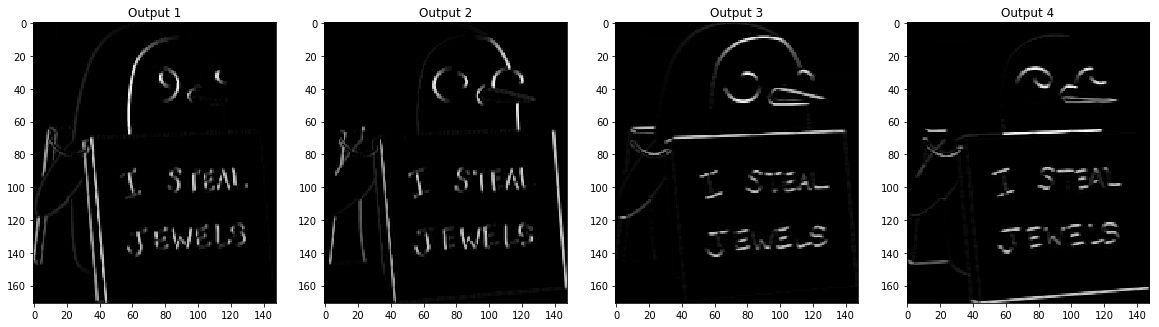

In [27]:

# visualize the output of the pooling layer
viz_layer(pooled_layer)

(1, 4, 343, 297)
(171, 148)


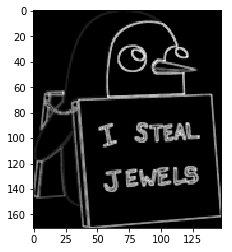

In [28]:
print(activated_layer.detach().numpy().shape)
# print out (1, 4, 2617, 4653)
edge = pooled_layer.detach().numpy()
edge = np.squeeze(edge)
merged_1 = np.add(edge[0], edge[1])
merged_2 = np.add(edge[2], edge[3])
merged_edge = np.add(merged_1, merged_2)
print(merged_edge.shape)
# prints out (2617, 4653)
plt.imshow(merged_edge,cmap='gray')
plt.show()